<a href="https://colab.research.google.com/github/Gazaleh/MathBio/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instructions**:
* Due **Friday April 12th** at 5pm.
* Submit assignments on Canvas, email (park.y@ufl.edu), or in person. You may take pictures of written work and submit electronically. Be sure to submit Colab links (if any) electronically. Do not modify the Colab notebook after submission.
* If using Colab, create a shared link using the option "**for anyone with the link**" and switch permission from **Viewer** to **Editor**, so that it says "Anyone on the internet with the link can edit".
  * I will only request permission once. Once the notebook has been shared, the version history must show that no edits were made after the deadline.

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Problem 1

Write code to numerically estimate the jacobian matrix of a 2x2 system.

Hint: With the following functions $f$ and $g$

In [ ]:
def f_example(v,n,I=0):
  return np.cos(v)-np.sin(n) + I

def g_example(v,n):
  return v-n

The output of your Jacobian matrix should be

<img src="https://i.imgur.com/qVK1q1S.png">

at $(v,n)=(0,\pi)$ with $h=0.01$. It may help to check the Jacobian for this example by hand, but this calculation won't count as part of the solution.

A complete solution should include:
* Your implementation of the Jacobian matrix for arbitrary functions $f$, $g$, with an input for $v$, $n$
* The output of your Jacobian code using the above f,g and inputs $v,n$.

In [ ]:
# feel free to use this template for your code.

def jac(z,f,g,h=.01):
  """Jacobian code template"""
  v,n = z

  dfdv = f(0,0) # Fix this line
  dfdn = g(0,0) # Fix this line
  dgdv = f(0,0) # Fix this line
  dgdn = g(0,0) # Fix this line

  return np.array([[dfdv,dfdn],[dgdv,dgdn]])

In [ ]:
jac([1,2],f_example,g_example) # output is incorrect. Your goal is to fix it.

array([[1., 0.],
       [1., 0.]])

# Problem 2A

Write code to simulate the Morris-Lecar model discussed in class. Use the following parameters (you may use $I_\text{app}=60$ to test your code:

<img src="https://i.imgur.com/LTtCfDP.png">



# Problem 2B

Fully reproduce the following figure:
<img src="https://i.imgur.com/UeTCTA3.png">

where the left panel uses $I_\text{app}=60$ and the right panel uses $I_\text{app}=100$.

Your plot should feature all the same text including axis labels, plot labels ($V_1(t)$ through $V_3(t)$) roughly the same axis limits, and the same qualitative features of the solutions (the left panel should show an excitable system where an initial condition above some threshold results in an action potential, and the right panel should show an oscillatory solution). You may take $n(0)=0$ (this choice may make your solution initially appear different from the figure, i.e., there may be transients that differ from the figure, but this is okay).

Hints:
* It will help to define separate functions `def f(v,n):` and `def g(v,n):` for the right-hand sides of $V$ and $n$, respectively so that it's easier to use the Jacobian code.
* See below for a template of the plotting code.

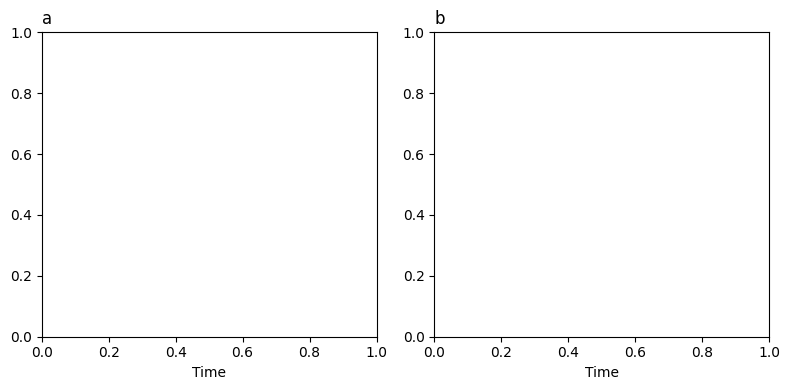

In [ ]:
# here's some code to get you started
# the exact positioning of labels is less important than reproducing the qualitative dynamics.

fig,axs = plt.subplots(1,2,figsize=(8,4))

axs[0].set_title('a',loc='left')
axs[1].set_title('b',loc='left')

axs[0].set_xlabel('Time')
axs[1].set_xlabel('Time')
plt.tight_layout()

# Problem 2C

With $I_\text{app} = 60$, numerically solve the Morris-Lecar model until the solution reaches a steady-state (it will be up to you to decide how long to integrate, but use panel a of the figure in Problem 2B). Use your Jacobian matrix code to calculate the eigenvalues at the steady-state values of $V$ and $n$. Are the eigenvalues consistent with how the solution behaves?

# Problem 3A

Plot the nullclines of the Morris-Lecar model for $I_\text{app} = 60$ and $I_\text{app} = 100$. You will generate two plots resembling the following:

<img src="https://i.imgur.com/JPwBJMe.png" align="left">
<img src="https://i.imgur.com/eAwblXI.png">

The left is for $I_\text{app}=60$ and the right is for $I_\text{app}=100$. Key features to reproduce include the x-axis range (-100 to 60), the y-axis range (0 to 0.8), and axis labels ($V$ on the x-axis and $n$ on the y-axis). You may include the title if you wish. Do not waste time reproducing every detail of the figures outside of what is required. I care about the ideas behind the figure, not the exact figure itself.

To generate nullclines we will extract the zero level curves of each function $f$ and $g$ (note that this approach is far from the most efficient or accurate method, but it'll do fine for now). Adjust the example code below to apply to the Morris-Lecar model.

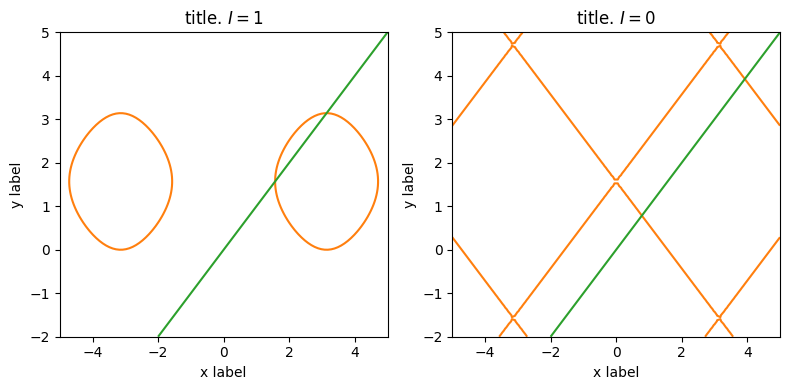

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(8,4))

vrange = np.linspace(-5,5,100)
nrange = np.linspace(-2,5,100)
vmesh,nmesh = np.meshgrid(vrange,nrange)

# note that I is different for each subplot.
# I=1 here. Should be I=60 for the Morris-Lecar model.
axs[0].contour(vmesh,nmesh,f_example(vmesh,nmesh,I=1),levels=[0],colors='tab:orange')
axs[0].contour(vmesh,nmesh,g_example(vmesh,nmesh),levels=[0],colors='tab:green')

# I=0 here. Should be I=100 for the Morris-Lecar model.
axs[1].contour(vmesh,nmesh,f_example(vmesh,nmesh,I=0),levels=[0],colors='tab:orange')
axs[1].contour(vmesh,nmesh,g_example(vmesh,nmesh),levels=[0],colors='tab:green')

# so long as your f and g functions are defined correctly, you can use this
# code to plot nullclines for the Morris-Lecar model.

axs[0].set_xlabel('x label')
axs[1].set_xlabel('x label')

axs[0].set_ylabel('y label')
axs[1].set_ylabel('y label')

axs[0].set_title('title. $I=1$')
axs[1].set_title('title. $I=0$')

plt.tight_layout()

# Problem 3B

Plot the same nullclines for the Morris-Lecar model, but now include one example solution for each subplot. You final answer should resemble the following:

<img src="https://i.imgur.com/g5bS5oG.png" align="left">
<img src="https://i.imgur.com/EUKWLKJ.png">

In particular, your solution should cross the $V$-nuclline (orange) vertically, and the $n$-nullcline (green) horizontally. Use approximately the same initial conditions, and include axis labels. Do not waste time reproducing every detail of the figures outside of what is required.

# Problem 3C (Optional)

Implement a root-finding method to find the intersection of the nullclines for each case where $I=60$ and for $I=100$. Use the Jacobian matrix to obtain eigenvalues in each case. Are the eigenvalues consistent with the behavior of the solutions?

# Problem 4

Derive the Nernst equation from the Nernst-Planck equation by setting the current to zero and integrating with respect to $x$ across the membrane.